[link](http://www.pyflux.com/docs/arimax.html)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/drivers.csv")

In [3]:
data.head()

,Unnamed: 0,time,drivers
0,1,1969.000000,1687
1,2,1969.083333,1508
2,3,1969.166667,1507
3,4,1969.250000,1385
4,5,1969.333333,1632


In [4]:
data.index = data['time'];
data.loc[(data['time']>=1983.05), 'seat_belt'] = 1;
data.loc[(data['time']<1983.05), 'seat_belt'] = 0;
data.loc[(data['time']>=1974.00), 'oil_crisis'] = 1;
data.loc[(data['time']<1974.00), 'oil_crisis'] = 0;

In [7]:
data.head()

,Unnamed: 0,time,drivers,seat_belt,oil_crisis
time,,,,,
1969.000000,1,1969.000000,1687,0.0,0.0
1969.083333,2,1969.083333,1508,0.0,0.0
1969.166667,3,1969.166667,1507,0.0,0.0
1969.250000,4,1969.250000,1385,0.0,0.0
1969.333333,5,1969.333333,1632,0.0,0.0


In [8]:
data.tail()

,Unnamed: 0,time,drivers,seat_belt,oil_crisis
time,,,,,
1984.583333,188,1984.583333,1284,1.0,1.0
1984.666667,189,1984.666667,1444,1.0,1.0
1984.750000,190,1984.750000,1575,1.0,1.0
1984.833333,191,1984.833333,1737,1.0,1.0
1984.916667,192,1984.916667,1763,1.0,1.0


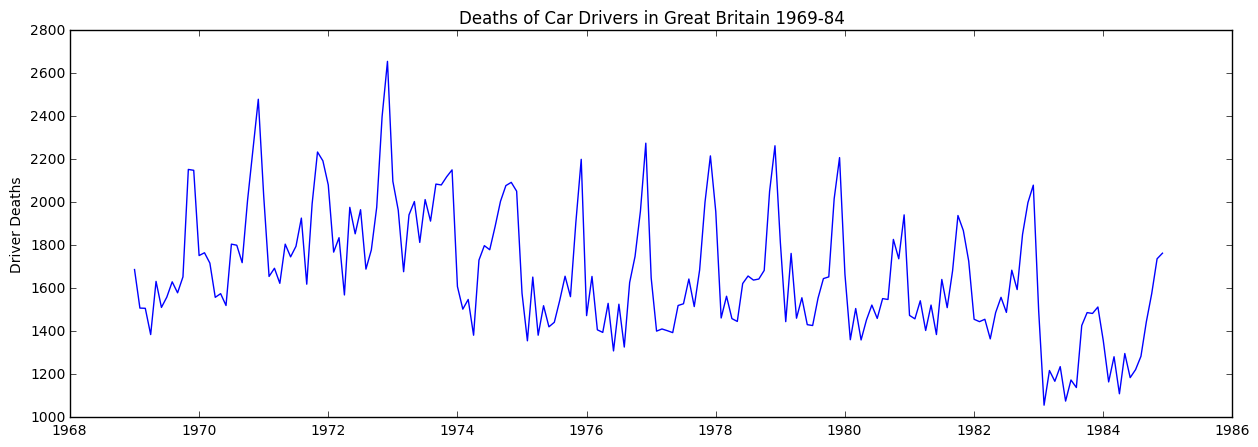

In [9]:
plt.figure(figsize=(15,5));
plt.plot(data.index,data['drivers']);
plt.ylabel('Driver Deaths');
plt.title('Deaths of Car Drivers in Great Britain 1969-84');
plt.plot();

In [13]:
model = pf.ARIMAX(data=data, formula='drivers~1+seat_belt+oil_crisis',
                  ar=1, ma=1, family=pf.Normal())
x = model.fit("MLE")
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: drivers                             Method: MLE                                       
Start Date: 1969.08333333                               Log Likelihood: -1297.4976                        
End Date: 1984.91666667                                 AIC: 2606.9951                                    
Number of observations: 191                             BIC: 2626.5088                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.9169     0.076      12.0657  0.0      (0.7679 | 1.0658)        
MA(1)                                

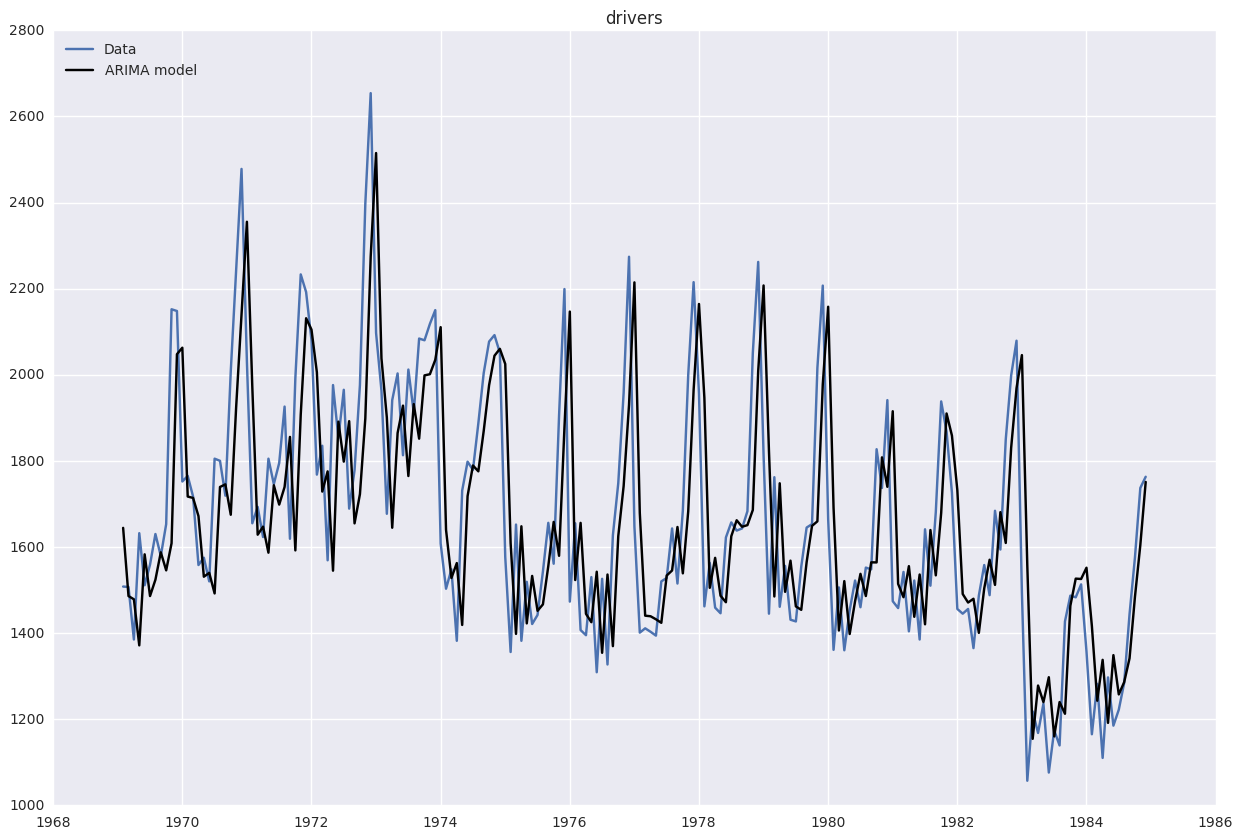

In [14]:
model.plot_fit(figsize=(15,10))